In [5]:
import sys
import subprocess
import pkg_resources

required_packages = {'pandas', 'numpy', 'matplotlib', 'seaborn'}
installed_packages = {pkg.key for pkg in pkg_resources.working_set}
missing_packages = required_packages - installed_packages

if missing_packages:
    print(f"Installing missing packages: {', '.join(missing_packages)}")
    python_executable = sys.executable
    try:
        subprocess.check_call(
            [python_executable, '-m', 'pip', 'install', *missing_packages],
            stdout=subprocess.DEVNULL
        )
        print("Installation complete.")
    except Exception as e:
        print(f"Error during installation: {e}")
        print("Please install the packages manually using 'pip install pandas numpy matplotlib seaborn'")
else:
    print("All required packages are already installed.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['lines.linewidth'] = 1.5

print("\nImports and setup complete.")

All required packages are already installed.

Imports and setup complete.


In [6]:
# --- Configuration ---
DATA_DIR = Path('../data/raw')
DATA_FILE = 'EURUSD_M5_2024-01-01_2025-07-25.parquet'
data_path = DATA_DIR / DATA_FILE

# --- Load Data ---
if not data_path.exists():
    print(f"ERROR: Data file not found at {data_path}")
    print("Please ensure you have run the data_sourcing.py script first.")
else:
    df = pd.read_parquet(data_path)
    print(f"Successfully loaded data from {data_path}")

Successfully loaded data from ..\data\raw\EURUSD_M5_2024-01-01_2025-07-25.parquet


In [7]:
print("--- Data Info ---")
df.info()

# Display the first few rows
print("\n--- Data Head ---")
display(df.head())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 164448 entries, 2024-01-01 22:05:00+00:00 to 2025-07-25 22:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    164448 non-null  float64
 1   high    164448 non-null  float64
 2   low     164448 non-null  float64
 3   close   164448 non-null  float64
 4   volume  164448 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 7.5 MB

--- Data Head ---


,open,high,low,close,volume
datetime,,,,,
2024-01-01 22:05:00+00:00,1.10427,1.10431,1.10424,1.10425,0
2024-01-01 22:10:00+00:00,1.10424,1.10430,1.10424,1.10427,0
2024-01-01 22:15:00+00:00,1.10425,1.10433,1.10423,1.10431,0
2024-01-01 22:20:00+00:00,1.10430,1.10433,1.10423,1.10423,0
2024-01-01 22:25:00+00:00,1.10431,1.10434,1.10420,1.10430,0


In [8]:
print("\n--- Data Description ---")
display(df.describe())


--- Data Description ---


,open,high,low,close,volume
count,164448.000000,164448.000000,164448.000000,164448.000000,164448.0
mean,1.089446,1.089619,1.089244,1.089397,0.0
std,0.034753,0.034775,0.034739,0.034747,0.0
min,1.018430,1.019070,1.017720,1.018420,0.0
25%,1.071260,1.071410,1.071110,1.071190,0.0
50%,1.084940,1.085000,1.084700,1.084850,0.0
75%,1.106470,1.106680,1.106270,1.106470,0.0
max,1.182570,1.182980,1.182110,1.182590,0.0


C:\Users\eleth\AppData\Local\Temp\ipykernel_1964\3854259053.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\eleth\Documents\EURUSD\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


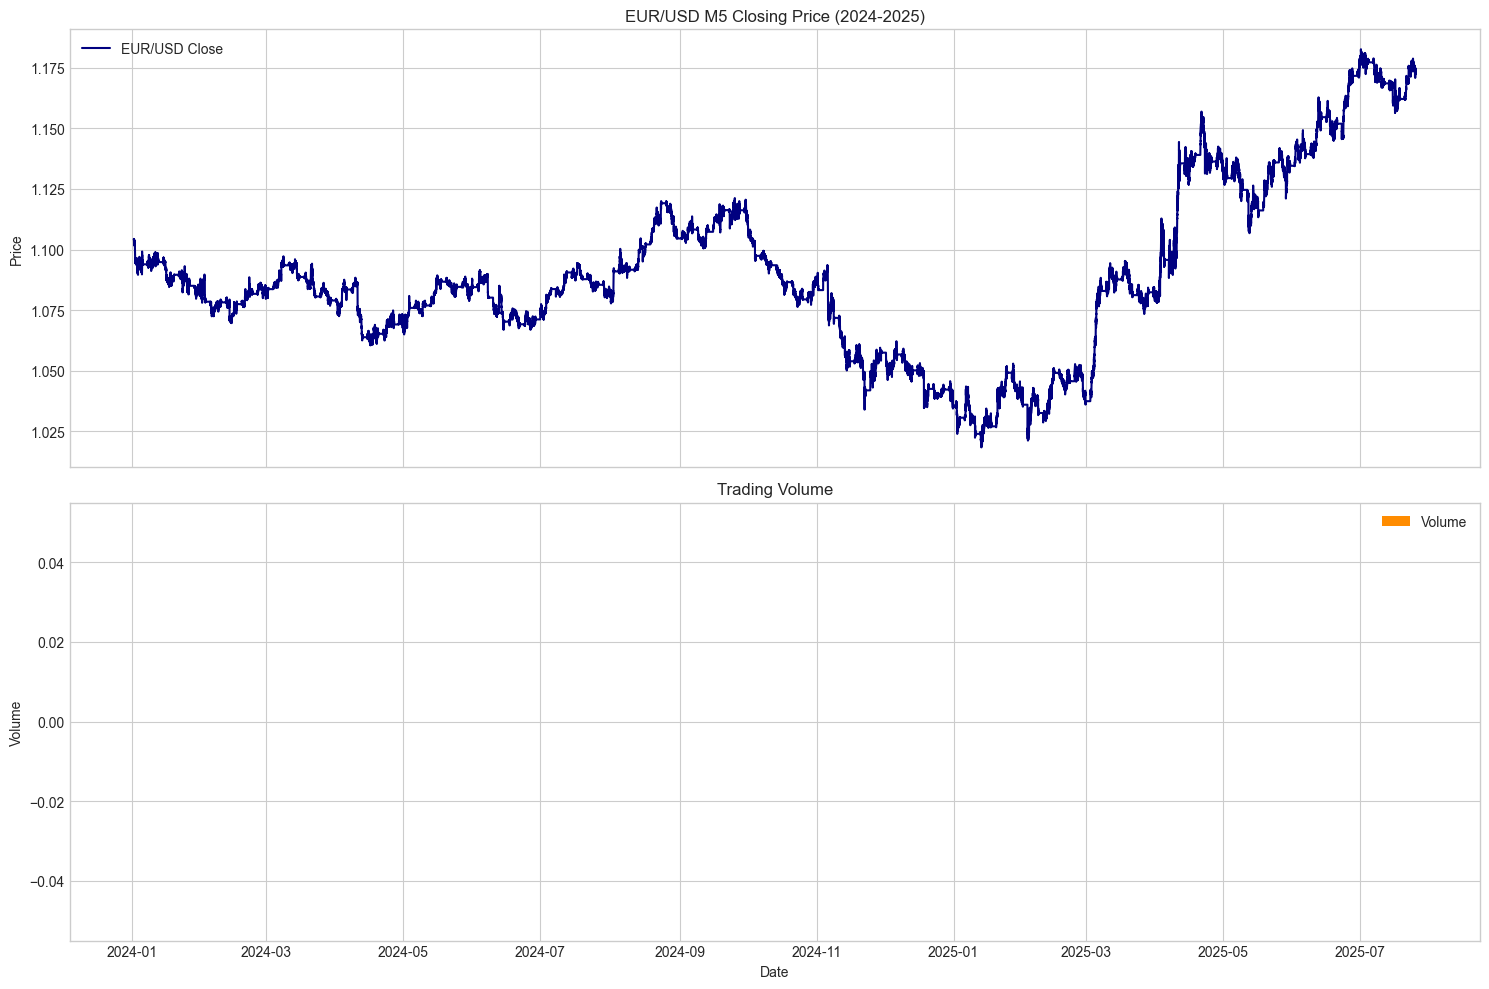

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot closing price
ax1.plot(df.index, df['close'], label='EUR/USD Close', color='navy')
ax1.set_title('EUR/USD M5 Closing Price (2024-2025)')
ax1.set_ylabel('Price')
ax1.legend()

# Plot volume
ax2.bar(df.index, df['volume'], label='Volume', color='darkorange', width=0.01)
ax2.set_title('Trading Volume')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.legend()

plt.tight_layout()
plt.show()

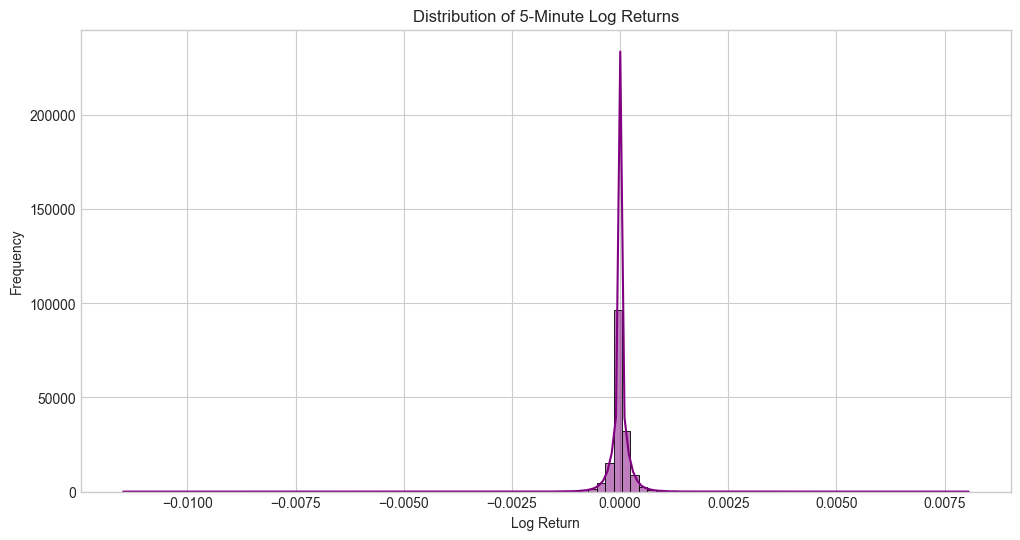

Skewness: -1.5509
Kurtosis: 104.6205


In [10]:
df['log_returns'] = np.log(df['close'] / df['close'].shift(1))

# Drop the first NaN value
df.dropna(inplace=True)

plt.figure(figsize=(12, 6))
sns.histplot(df['log_returns'], bins=100, kde=True, color='purple')
plt.title('Distribution of 5-Minute Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()

print(f"Skewness: {df['log_returns'].skew():.4f}")
print(f"Kurtosis: {df['log_returns'].kurtosis():.4f}")

C:\Users\eleth\AppData\Local\Temp\ipykernel_1964\2176842037.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='volatility', data=df, ax=ax1, palette='magma')
C:\Users\eleth\AppData\Local\Temp\ipykernel_1964\2176842037.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='volatility', data=df, ax=ax2, palette='magma')
C:\Users\eleth\AppData\Local\Temp\ipykernel_1964\2176842037.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(day_names)


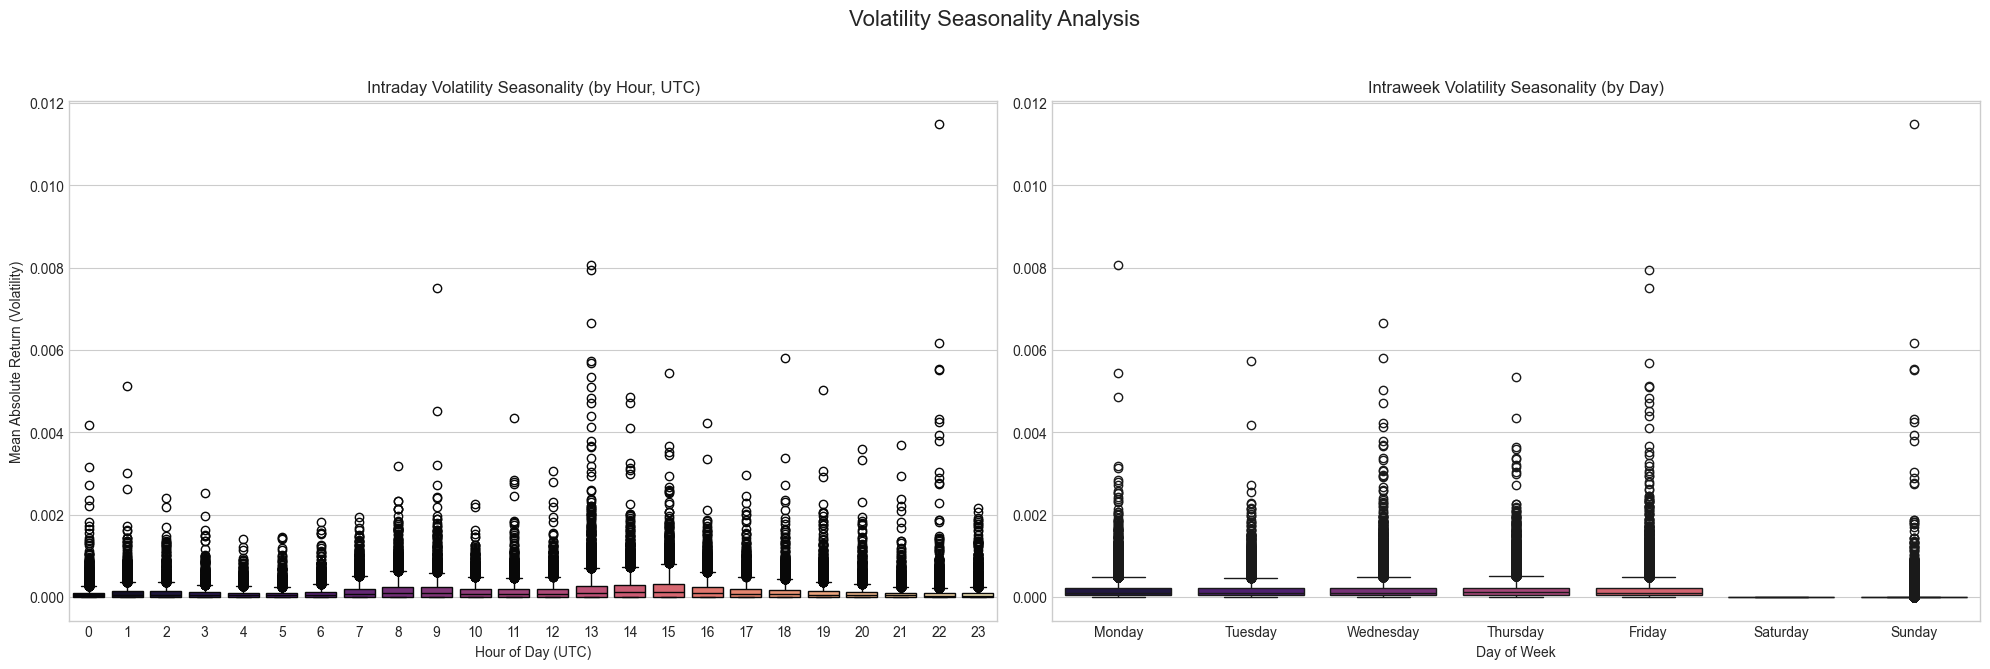

In [11]:
df['volatility'] = df['log_returns'].abs()

# Extract time features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek # Monday=0, Sunday=6

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Intraday (Hourly) Seasonality
sns.boxplot(x='hour', y='volatility', data=df, ax=ax1, palette='magma')
ax1.set_title('Intraday Volatility Seasonality (by Hour, UTC)')
ax1.set_xlabel('Hour of Day (UTC)')
ax1.set_ylabel('Mean Absolute Return (Volatility)')

# Intraweek (Daily) Seasonality
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(x='day_of_week', y='volatility', data=df, ax=ax2, palette='magma')
ax2.set_title('Intraweek Volatility Seasonality (by Day)')
ax2.set_xticklabels(day_names)
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('') # Remove redundant y-label

plt.suptitle('Volatility Seasonality Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

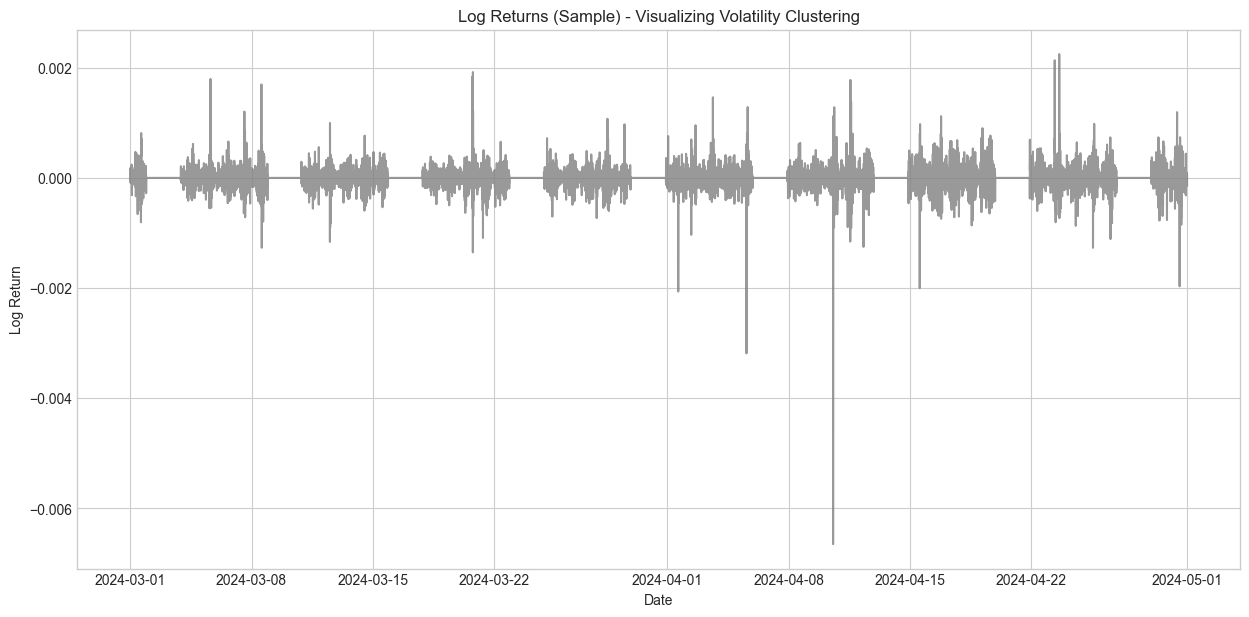

In [12]:
# Plot log returns to visually inspect for clustering
sample_df = df.loc['2024-03-01':'2024-04-30']

plt.figure(figsize=(15, 7))
plt.plot(sample_df.index, sample_df['log_returns'], color='gray', alpha=0.8)
plt.title('Log Returns (Sample) - Visualizing Volatility Clustering')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()